In [1]:
import numpy as np
from ElasticClass import ElasticProps

import matplotlib.pyplot as plt
import matplotlib as mpl

# set a custom figure style (this is optional, you can comment on this whole block)
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['font.family'] = 'Open Sans'

Elasticity is defined by the following relation known as the Hooke's law:

$$
\sigma_{ij} = C_{ijkl} \cdot \varepsilon_{kl}
$$

which expanded becomes a 6 x 6 symmetric tensor 

$$
\begin{bmatrix}
\sigma_{11} \\
\sigma_{22} \\
\sigma_{33} \\
\sigma_{23} \\
\sigma_{31} \\
\sigma_{12} 
\end{bmatrix}
=
\begin{bmatrix}
C_{1111} & C_{1122} & C_{1133} & C_{1123} & C_{1131} & C_{1112} \\
C_{2211} & C_{2222} & C_{2233} & C_{2223} & C_{2231} & C_{2212} \\
C_{3311} & C_{3322} & C_{3333} & C_{3323} & C_{3331} & C_{3312} \\
C_{2311} & C_{2322} & C_{2333} & C_{2323} & C_{2331} & C_{2312} \\
C_{3111} & C_{3122} & C_{1333} & C_{3123} & C_{3131} & C_{3112} \\
C_{1211} & C_{1222} & C_{1233} & C_{1223} & C_{1231} & C_{1212} 
\end{bmatrix}

\begin{bmatrix}
\epsilon_{11} \\
\epsilon_{22} \\
\epsilon_{33} \\
2\epsilon_{23} \\
2\epsilon_{31} \\
2\epsilon_{12} 
\end{bmatrix}
$$

which in Voigt notation becomes

$$
\begin{bmatrix}
\sigma_{1} \\
\sigma_{2} \\
\sigma_{3} \\
\sigma_{4} \\
\sigma_{5} \\
\sigma_{6} 
\end{bmatrix}
=
\begin{bmatrix}
C_{11} & C_{12} & C_{13} & C_{14} & C_{15} & C_{16} \\
C_{12} & C_{22} & C_{23} & C_{24} & C_{25} & C_{26} \\
C_{13} & C_{23} & C_{33} & C_{34} & C_{35} & C_{36} \\
C_{14} & C_{24} & C_{34} & C_{44} & C_{45} & C_{46} \\
C_{15} & C_{25} & C_{35} & C_{45} & C_{55} & C_{56} \\
C_{16} & C_{26} & C_{36} & C_{46} & C_{56} & C_{66} 
\end{bmatrix}

\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\epsilon_{3} \\
2\epsilon_{4} \\
2\epsilon_{5} \\
2\epsilon_{6} 
\end{bmatrix}
$$

In [2]:
# density (g/cm3) at 1.5 GPa and RT from Wang et al. (2015)
rho_aqtz = 2.742

# elastic constants of alpha quartz at 1.5 GPa
C11 = 90.3
C33 = 122.3
C44 = 62.4
C12 = 15.4
C13 = 23.7
C14 = 10.7

# dependent terms
C66 = 0.5 * (C11 - C12)
C22, C55, C23, C24, C56 = C11, C44, C13, -C14, C14

# Elastic stiffness tensor (in GPa) values as a Cij matrix
Cij_aQtz = np.array(
    [[C11, C12, C13, C14, 0.0, 0.0],
    [ C12, C22, C23, C24, 0.0, 0.0],
    [ C13, C23, C33, 0.0, 0.0, 0.0],
    [ C14, C24, 0.0, C44, 0.0, 0.0],
    [ 0.0, 0.0, 0.0, 0.0, C55, C56],
    [ 0.0, 0.0, 0.0, 0.0, C56, C66]])

In [3]:
# Density of Plagioclase Anorthite 37 (g/cm3) at RT-RP fom Brown et al. (2016)
rho_An37 = 2.666

# elastic constants of anorthite-37 at 1 GPa
C11 =  96.2
C22 = 189.4
C33 = 171.9
C44 =  23.6
C55 =  33.1
C66 =  35.5
C12 =  46.1
C13 =  38.4
C14 =   5.9
C15 =  -0.2
C16 =  -0.4
C23 =  15.4
C24 =  -7.0
C25 =  -5.1
C26 =  -6.8
C34 =   2.2
C35 =   7.2
C36 =  -9.8
C45 =  -1.1
C46 =  -4.8
C56 =   1.4

# Elastic stiffness tensor (in GPa) values as a Cij matrix at 1 Gpa
Cij_An37 = np.array( 
    [[C11, C12, C13, C14, C15, C16],
    [ C12, C22, C23, C24, C25, C26],
    [ C13, C23, C33, C34, C35, C36],
    [ C14, C24, C34, C44, C45, C46],
    [ C15, C25, C35, C45, C55, C56],
    [ C16, C26, C36, C46, C56, C66]])

In [4]:
# Density (g/cm3) of omphacite at 1.5 GPa derived from data in Hao et al. (2019)
rho_Omph_ref = 3.34
rho_Omph = rho_Omph_ref + 1.5 * 0.0266 + 1.5**2 * - 0.0002

# TODO

In [5]:
# Density (g/cm3) of diopside at 1.5 GPa recalculated from Sang and Bass (2014)
rho_diop = 3.305

# elastic constants of diopside at 1.5 GPa and RT
C11 = 238.7
C22 = 188.7
C33 = 255.9
C44 =  81.5
C55 =  71.2
C66 =  80.9
C12 =  84.9
C13 =  76.3
C15 =   8.8
C23 =  62.4
C25 =   4.3
C35 =  39.1
C46 =   4.5

# Elastic stiffness tensor (in GPa) values as a Cij matrix at 1 Gpa
Cij_diop = np.array( 
    [[C11, C12, C13, 0.0, C15, 0.0],
    [ C12, C22, C23, 0.0, C25, 0.0],
    [ C13, C23, C33, 0.0, C35, 0.0],
    [ 0.0, 0.0, 0.0, C44, 0.0, C46],
    [ C15, C25, C35, 0.0, C55, 0.0],
    [ 0.0, 0.0, 0.0, C46, 0.0, C66]])

In [6]:
# Density (g/cm3) of Fe-bearing orthoenstatite at 1.5 GPa and RT recalculated from Zhang and Bass (2016) using a custom fitting
rho_ens = 3.329

# elastic constants of Fe-bearing orthoenstatite at 1.5 GPa and RT custom fitting (see excel file)
C11 = 249.2
C22 = 189.8
C33 = 241.2
C44 =  86.1
C55 =  80.7
C66 =  83.8
C12 =  89.1
C13 =  72.7
C23 =  65.5


# Elastic stiffness tensor (in GPa) values as a Cij matrix
Cij_ens = np.array(
    [[C11, C12, C13, 0.0, 0.0, 0.0],
    [ C12, C22, C23, 0.0, 0.0, 0.0],
    [ C13, C23, C33, 0.0, 0.0, 0.0],
    [ 0.0, 0.0, 0.0, C44, 0.0, 0.0],
    [ 0.0, 0.0, 0.0, 0.0, C55, 0.0],
    [ 0.0, 0.0, 0.0, 0.0, 0.0, C66]])

In [7]:
# Density (g/cm3) of amphibole pargasite (num 8) at RP-RT from Brown and Abramson (2016)
rho_parg = 3.163

# elastic constants of pargasite at RP-RT
C11 = 141.6
C22 = 197.8
C33 = 225.4
C44 =  75.8
C55 =  49.9
C66 =  51.7
C12 =  57.1
C13 =  49.6
C15 =  -0.2
C23 =  60.9
C25 = -10.9
C35 = -31.4
C46 =   3.3

# Elastic stiffness tensor (in GPa) values as a Cij matrix
Cij_parg = np.array( 
    [[C11, C12, C13, 0.0, C15, 0.0],
    [ C12, C22, C23, 0.0, C25, 0.0],
    [ C13, C23, C33, 0.0, C35, 0.0],
    [ 0.0, 0.0, 0.0, C44, 0.0, C46],
    [ C15, C25, C35, 0.0, C55, 0.0],
    [ 0.0, 0.0, 0.0, C46, 0.0, C66]])

In [8]:
# Density (g/cm3) of Fe-bearing San Carlos olivine at 1.5 GPa and 1027°C (1300 K), custom fitting from Zhang and Bass (2016)
rho_Fo90 = 3.291

# elastic constants of San Carlos olivine at 1.5 GPa and 1027°C (1300 K), custom fitting from Zhang and Bass (2016)
C11 = 280.2
C22 = 182.1
C33 = 207.6
C44 =  56.8
C55 =  68.8
C66 =  68.5
C12 =  71.9
C13 =  67.2
C23 =  70.1

# Elastic stiffness tensor (in GPa) values as a Cij matrix
Cij_Fo90 = np.array(
    [[C11, C12, C13, 0.0, 0.0, 0.0],
    [ C12, C22, C23, 0.0, 0.0, 0.0],
    [ C13, C23, C33, 0.0, 0.0, 0.0],
    [ 0.0, 0.0, 0.0, C44, 0.0, 0.0],
    [ 0.0, 0.0, 0.0, 0.0, C55, 0.0],
    [ 0.0, 0.0, 0.0, 0.0, 0.0, C66]])

In [9]:
# Density (g/cm3) averaged from several chlinochlores in Katahara (1996)
rho_chl = 2.71

# independent elastic constants of chlorite as in Table 3 in Mookherjee and Mainprice (2014) RP-RT
C11 = 197.8
C22 = 202.3
C33 = 135.1
C44 =  24.5
C55 =  24.4
C66 =  70.3
C12 =  60.7
C13 =  21.1
C15 =   3.3
C23 =  34.1
C25 =   0.2
C35 =   0.4
C46 =   0.1

# Elastic stiffness tensor (in GPa) values as a Cij matrix
Cij_chl = np.array( 
    [[C11, C12, C13, 0.0, C15, 0.0],
    [ C12, C22, C23, 0.0, C25, 0.0],
    [ C13, C23, C33, 0.0, C35, 0.0],
    [ 0.0, 0.0, 0.0, C44, 0.0, C46],
    [ C15, C25, C35, 0.0, C55, 0.0],
    [ 0.0, 0.0, 0.0, C46, 0.0, C66]])

In [10]:
quartz = ElasticProps(Cij=Cij_aQtz,
                       density=rho_aqtz,
                       mineral_name='alpha quartz',
                       reference='Wang et al. (2015)',
                       crystal_system='Trigonal',
                       pressure=1.5,
                       temperature=24)

plag_an37 = ElasticProps(Cij=Cij_An37,
                          density=rho_An37,
                          mineral_name='anorthite37',
                          reference='Brown et al. (2016)',
                          crystal_system='Triclinic',
                          pressure=1.0,
                          temperature=24)

diopside = ElasticProps(Cij=Cij_diop,
                         density=rho_diop,
                         mineral_name='diopside',
                         reference='Sang and Bass (2014)',
                         crystal_system='Monoclinic',
                         pressure=1.0,
                         temperature=24)

enstatite = ElasticProps(Cij=Cij_ens,
                          density=rho_ens,
                          mineral_name='orthoenstatite',
                          reference='Zhang and Bass (2016)',
                          crystal_system='Orthorhombic',
                          pressure=1.5,
                          temperature=24)

pargasite = ElasticProps(Cij=Cij_parg,
                          density=rho_parg,
                          mineral_name='pargasite',
                          reference='Brown and Abramson (2016)',
                          crystal_system='Monoclinic',
                          pressure=1e-4,
                          temperature=24)


olivine = ElasticProps(Cij=Cij_Fo90,
                        density=rho_Fo90,
                        mineral_name='forsterite90',
                        reference='Zhang and Bass (2016)',
                        crystal_system='Orthorhombic',
                        pressure=1.5,
                        temperature=1027)

chlorite = ElasticProps(Cij=Cij_chl,
                         density=rho_chl,
                         mineral_name='chlorite',
                         reference='Mookherjee and Mainprice (2014)',
                         crystal_system='Monoclinic',
                         pressure=1e-4,
                         temperature=24)

min_list = [quartz, plag_an37, diopside, enstatite, pargasite, olivine, chlorite]

Text(0, 0.5, 'average (VRH) Vp (km/s)')

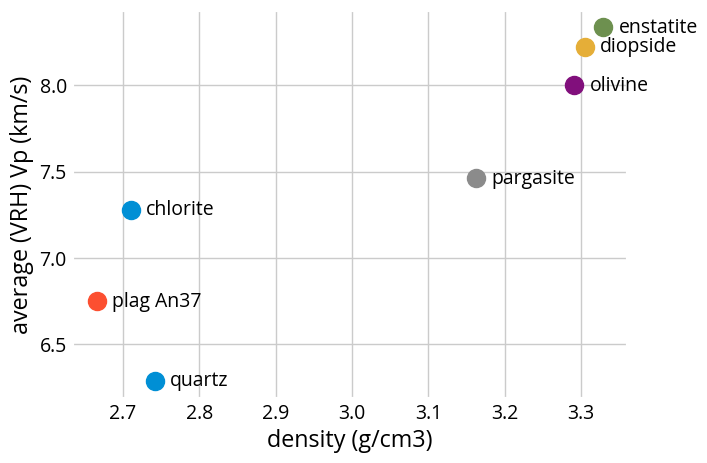

In [11]:
mineral = ['quartz', 'plag An37', 'diopside', 'enstatite', 'pargasite', 'olivine', 'chlorite']

fig, ax = plt.subplots()

for index, item in enumerate(min_list):
    ax.plot(item.density, item.isotropic_vp_hill, 'o', markersize=13, label=mineral[index])
    ax.annotate(mineral[index], xy=(item.density, item.isotropic_vp_hill), xytext=(item.density + 0.02, item.isotropic_vp_hill - 0.03))

ax.set_xlabel('density (g/cm3)')
ax.set_ylabel('average (VRH) Vp (km/s)')

In [12]:
plag_an37

<class 'ElasticClass.ElasticProps'>

Mineral Name: anorthite37
Reference Source: Brown et al. (2016)
Crystal System: Triclinic
Pressure (GPa): 1.0
Temperature (°C): 24
Density (g/cm3): 2.666

Elastic Tensor (Cij) in GPa:
[[ 96.2  46.1  38.4   5.9  -0.2  -0.4]
 [ 46.1 189.4  15.4  -7.   -5.1  -6.8]
 [ 38.4  15.4 171.9   2.2   7.2  -9.8]
 [  5.9  -7.    2.2  23.6  -1.1  -4.8]
 [ -0.2  -5.1   7.2  -1.1  33.1   1.4]
 [ -0.4  -6.8  -9.8  -4.8   1.4  35.5]]

Anisotropy indexes:
    Universal Elastic Anisotropy:           1.364
    Kube's Anisotropy Index (proportional): 0.521

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt        73.033         42.280          0.257
    Hill        70.920         37.910          0.273
   Reuss        68.807         33.539          0.290

Isotropic seismic properties:
Unit:km/s    Vp    Vs  Vp/vs
    Voigt 6.967 3.982   1.75
     Hill 6.750 3.771   1.79
    Reuss 6.526 3.547   1.84

In [13]:
Cij_custom = np.array( 
    [[200.5,  63.18,  62.41, -0.14, -0.06,  0.94],
    [ 63.18, 192.96,  63.08, -0.51, -0.13,  0.7],
    [ 62.41,  63.08, 185.38, -0.42, -0.03, -0.16],
    [ -0.14,  -0.51,  -0.42, 62.96,  0.32,  0.07],
    [ -0.06,  -0.13,  -0.03,  0.32, 64.42, -0.26],
    [  0.94,   0.7,   -0.16,  0.07, -0.26, 66.56]])

ElasticProps(Cij=Cij_custom,
             density=3.2155,
             mineral_name='rock',
             reference=None,
             crystal_system='Triclinic',
             pressure=1.8,
             temperature=24)

<class 'ElasticClass.ElasticProps'>

Mineral Name: rock
Reference Source: None
Crystal System: Triclinic
Pressure (GPa): 1.8
Temperature (°C): 24
Density (g/cm3): 3.216

Elastic Tensor (Cij) in GPa:
[[ 2.0050e+02  6.3180e+01  6.2410e+01 -1.4000e-01 -6.0000e-02  9.4000e-01]
 [ 6.3180e+01  1.9296e+02  6.3080e+01 -5.1000e-01 -1.3000e-01  7.0000e-01]
 [ 6.2410e+01  6.3080e+01  1.8538e+02 -4.2000e-01 -3.0000e-02 -1.6000e-01]
 [-1.4000e-01 -5.1000e-01 -4.2000e-01  6.2960e+01  3.2000e-01  7.0000e-02]
 [-6.0000e-02 -1.3000e-01 -3.0000e-02  3.2000e-01  6.4420e+01 -2.6000e-01]
 [ 9.4000e-01  7.0000e-01 -1.6000e-01  7.0000e-02 -2.6000e-01  6.6560e+01]]

Anisotropy indexes:
    Universal Elastic Anisotropy:           0.006
    Kube's Anisotropy Index (proportional): 0.002

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt       106.242         64.799          0.247
    Hill       106.190         64.767          0.247
   Reuss       106.137        

In [14]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)

Notebook tested in 2023-08-23 using:
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:01:18) [MSC v.1916 64 bit (AMD64)]
Numpy 1.25.2


---
Any copyright is dedicated to the Public Domain.
https://creativecommons.org/publicdomain/zero/1.0/